# BPDL results on Synthetic datasets

Presenting results from starting version of Atlas Learning Pattern Encoding

In [1]:
%matplotlib inline
import os, sys, glob
import pandas, numpy
from skimage import io
import matplotlib.pylab as plt
from matplotlib import gridspec
import apdl.dataset_utils as gen_data

In [8]:
p_csv = os.path.expanduser('~/Dropbox/Documents/lab_CMP-BIA/paper_2017_drosophila_APDL/data/experiments_synth_APDL_binary_overall.csv')
# p_csv = os.path.expanduser(os.path.join('results', 'experiments_synth_APDL_overall.csv'))
print os.path.exists(p_csv), '<-', p_csv

DATASET = 'atomicPatternDictionary_v0'
p_data = '/mnt/F464B42264B3E590/TEMP'
print os.path.exists(p_data), '<-', p_data

True <- /home/jirka/Dropbox/Documents/lab_CMP-BIA/paper_2017_drosophila_APDL/data/experiments_synth_APDL_binary_overall.csv
True <- /mnt/F464B42264B3E590/TEMP


## Loading data

In [11]:
df_all = pandas.DataFrame().from_csv(p_csv, index_col=None)
df_all.sort(['nb_labels'], inplace=True)
print '-> loaded DF with', len(df_all), 'items and columns:\n', df_all.columns.tolist()
d_unique = {col: df_all[col].unique().tolist() 
            for col in ['dataset', 'gc_regul', 'gc_reinit', 'init_tp', 'ptn_split']}
print '-> unique:', d_unique

-> loaded DF with 11683 items and columns:
['atlas_ARS', 'case', 'class', 'computer', 'dataset', 'folders', 'gc_regul', 'gc_reinit', 'init_tp', 'max_iter', 'name', 'nb_jobs', 'nb_labels', 'nb_res', 'nb_runs', 'nb_samples', 'overlap_mj', 'path_exp', 'path_in', 'path_out', 'ptn_compact', 'ptn_split', 'reconstruct_diff', 'subfiles', 'time', 'tol', 'type']
-> unique: {'init_tp': ['msc2', 'GTd', 'msc', 'rnd', 'msc1', 'GT', 'OWSr', 'OWS', 'GWS'], 'ptn_split': [False, True], 'gc_reinit': [True, nan], 'gc_regul': [0.001, 0.0, 9.999999999999999e-16, 1e-09], 'dataset': ['datasetBinary_noise', 'datasetBinary_raw', 'datasetBinary_defNoise', 'datasetBinary_deform']}


/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from IPython.kernel.zmq import kernelapp as app


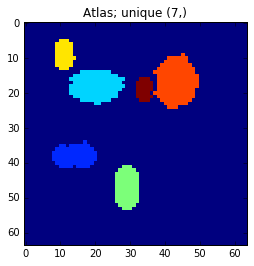

In [12]:
atlas = gen_data.dataset_compose_atlas(os.path.join(p_data, DATASET))
_ = plt.imshow(atlas, interpolation='nearest')
_ = plt.title('Atlas; unique {}'.format(numpy.unique(atlas).shape))

In [13]:
print 'path_in:', df_all['path_in'].unique()
print 'gc_regul:', df_all['gc_regul'].unique()

path_in: [ '/datagrid/Medical/microscopy/drosophila/synthetic_data/atomicPatternDictionary_v0'
 '/datagrid/Medical/microscopy/drosophila/synthetic_data/atomicPatternDictionary_v1'
 '/datagrid/Medical/microscopy/drosophila/synthetic_data/atomicPatternDictionary_v2'
 '/datagrid/Medical/microscopy/drosophila/synthetic_data/atomicPatternDictionary_v3']
gc_regul: [  1.00000000e-03   0.00000000e+00   1.00000000e-15   1.00000000e-09]


## Dependency on number of used patterns

take out the series with various param combination

In [14]:
GC_REGUL = 0.0
df_select = df_all[df_all['path_in'].str.endswith(DATASET)]
df_select = df_select[df_select['gc_regul'] == GC_REGUL]
# df_select = df_select[df_select['ptn_split'] == False]
print 'selected records:', len(df_select)
df_res = pandas.DataFrame()
for v, df_gr0 in df_select.groupby('dataset'):
    for v1, df_gr1 in df_gr0.groupby('init_tp'):
        for v2, df_gr2 in df_gr1.groupby('ptn_split'):
            # for v1, df_gr1 in df_gr0.groupby('overlap_mj'):
            name = '"{}", split ({})'.format(v1, int(v2))
            d = {'dataset': v, 'name': name}
            cols = ['nb_labels', 'atlas_ARS', 'reconstruct_diff', 'time', 'subfiles']
            d.update({col: df_gr2[col].tolist() for col in cols})
            df_res = df_res.append(d, ignore_index=True)
df_res = df_res.set_index('name')
# df_res.to_csv(os.path.join(os.path.dirname(p_csv), 'synth_APDL_%s_gc_%f.csv' % (DATASET, GC_REGUL)))
print 'number of rows:', len(df_res), 'columns:', df_res.columns.tolist()

selected records: 1152
number of rows:

 72 columns: ['atlas_ARS', 'dataset', 'nb_labels', 'reconstruct_diff', 'subfiles', 'time']


visualization per dataset (difficulty) and different param combination; sub fules corelate with mean number of iterartions ~ (subfiles / 2)

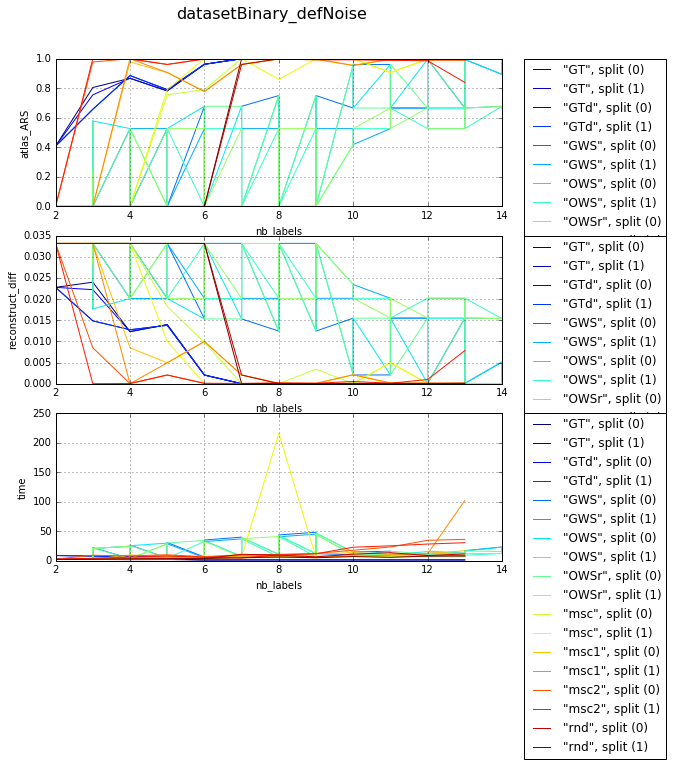

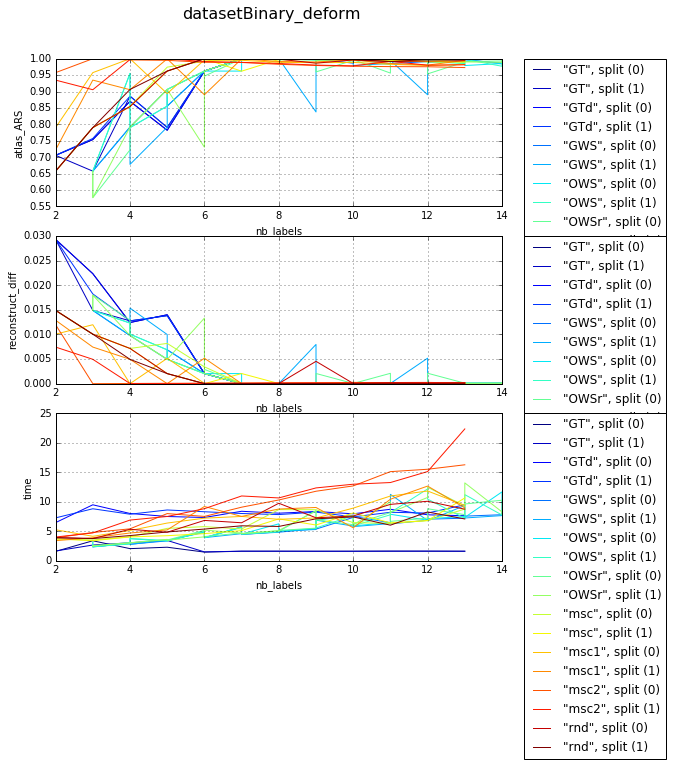

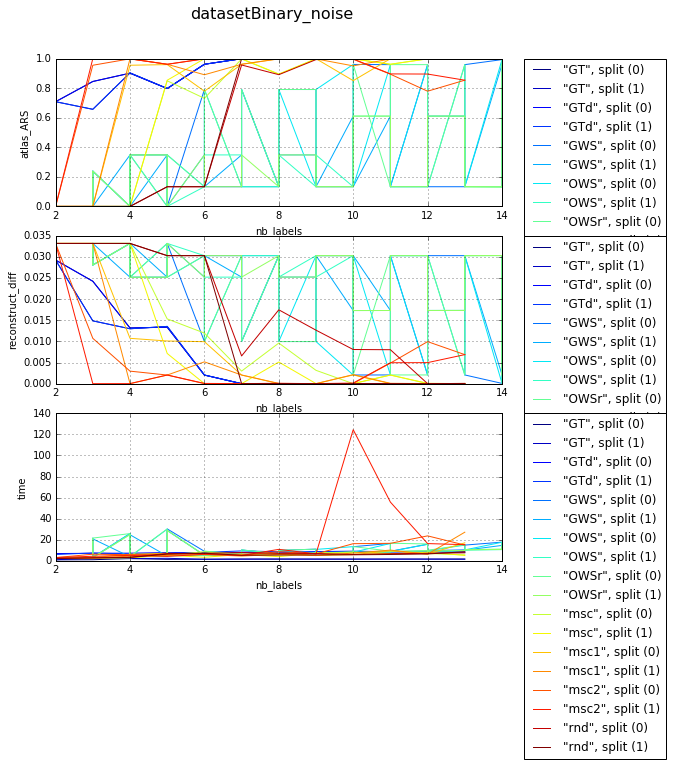

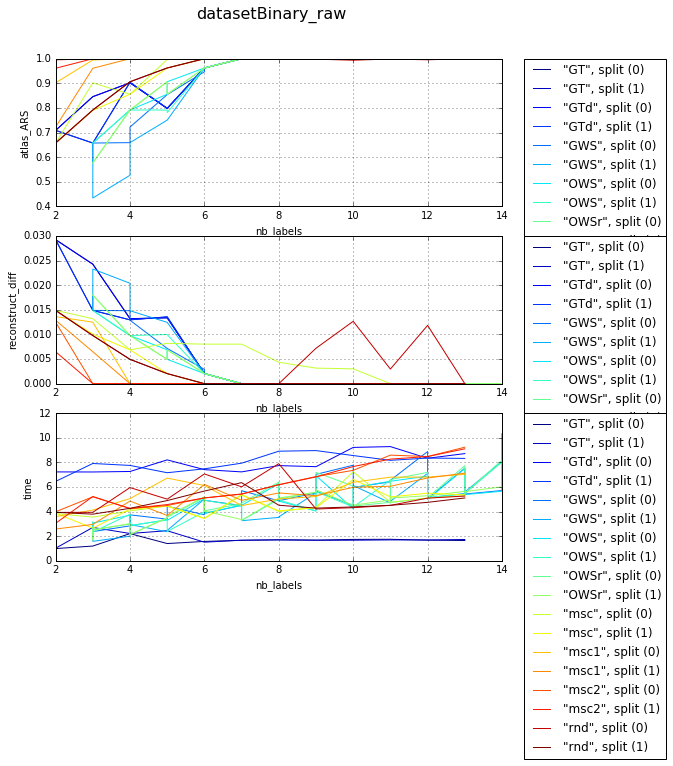

In [15]:
# ADD graph ['nb_lbs', 'atlas_ARS', 'reconstruct_diff', 'subfiles'] and name as curve
l_graphs = ['atlas_ARS', 'reconstruct_diff', 'time']
for v, df_group in df_res.groupby('dataset'):
    clrs = plt.cm.jet(numpy.linspace(0, 1, len(df_group)))
    fig, axarr = plt.subplots(len(l_graphs), 1, figsize=(8, 9))
    fig.suptitle('{}'.format(v), fontsize=16)
    for i, col in enumerate(l_graphs):
        for j, (idx, row) in enumerate(df_group.iterrows()):
            axarr[i].plot(row['nb_labels'], row[col], label=idx, color=clrs[j])
        axarr[i].set_xlabel('nb_labels'), axarr[i].set_ylabel(col), axarr[i].grid()
        axarr[i].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [5]:
# df_show = df_all[(df_all['sub_dataset'] == 'datasetBinary_defNoise')
#                  & (df_all['overlap_mj'] != True) ].sort(['nb_lbs'])
# for v, df_group in df_show.groupby('sub_dataset'):
#     plt.figure(figsize=(12, 8)), plt.suptitle('{}'.format(v), fontsize=16)
#     gs = gridspec.GridSpec(len(df_group['init_tp'].unique()), 
#                            len(df_group['ptn_split'].unique()))
#     for j, (v_j, df_sub) in enumerate(df_group.groupby('init_tp')):
#         for i, (v_i, df_res) in enumerate(df_sub.groupby('ptn_split')):
#             ax = df_res[['nb_lbs', 'atlas_ARS', 'reconstruct_diff']].plot(x='nb_lbs', 
#                         ax=plt.subplot(gs[j, i]), grid=True,  # secondary_y=['reconstruct_diff'], 
#                         title='ptn_split: {}, init: {}'.format(v_i, v_j))
#             df_res.plot(kind='scatter', x='nb_lbs', y='atlas_ARS', s=df_res['subfiles'] * 10, 
#                         edgecolors='red', facecolors='none', ax=ax, label='nb_iter')
#             lines = ax.get_lines()  # + ax.right_ax.get_lines()
#             ax.legend(lines, [l.get_label() for l in lines], loc='center right')
#             #ax.right_ax.set_ylabel('reconstruct_diff')
#     plt.tight_layout(), plt.subplots_adjust(top=0.9)